In [57]:
from scripts.BlackScholes import BlackScholes
import numpy as np
import matplotlib.pyplot as plt 

from tqdm import tqdm

In [58]:
# Japanese market
S0 = 30000
mu_f = 0.05
r_f = 0.05
sigma_f = 0.2

# American market
r_d = 0.05
sigma_d = 0.2

# FX market
sigma_X = 0.2
X0 = 1/100

# Hedging 
sigma_H = 0.2
Nhedge = 12

# Option
T = 2
K = S0

# Simulation
Nrep = 1000

St = np.array([S0]*Nrep)
Xt = np.array([X0]*Nrep)
dt = T/Nhedge

q = r_d - r_f + sigma_X*sigma_f
# Inital pay in, in dollars
initialoutlay = BlackScholes(T=T,strike=K,r=r_d,sigma=sigma_H,q=q,option_type='put')
initialoutlay = initialoutlay.valuation(spot=S0)
Vpf = np.array([initialoutlay]* Nrep)
print(f"We get {round(Vpf[0])}Yen from the option")

# Number of stocks we sell
model = BlackScholes(T=T,strike=K,r=r_d,sigma=sigma_H,q=q,option_type='put',greek_type='delta')
nbr_stocks = np.array([model.valuation(s) for s in St.tolist()])
bank_account = Vpf - nbr_stocks * St
print(f"We buy: {nbr_stocks[0]} stocks and put {round(bank_account[0])} into the bank account")

We get 28980Yen from the option
We buy: -0.3840182595174672 stocks and put 40501 into the bank account


In [59]:


for i in tqdm(range(1,Nhedge)):

    # Update stocks and exchange rate
    BM = np.sqrt(dt) * np.random.normal(size=Nrep)
    St = St * np.exp((mu_f - sigma_X * sigma_f - sigma_f**2/2)*dt + sigma_f * BM)
    Xt = Xt * np.exp((r_d - r_f - sigma_X**2/2)*dt + sigma_X * BM)

    # We get monney from Japanese bank account and from Japanese Stocks
    Vpf = nbr_stocks * St + bank_account * np.exp(dt*r_f)    

    # How many japanese Stocks do we sell
    model = BlackScholes(T=T-(i-1)*dt,strike=K, r=r_d,sigma=sigma_H,q=q,option_type='put',greek_type='delta')
    nbr_stocks = np.array([model.valuation(s) for s in St.tolist()]) * X0 / Xt
    nbr_bonds = Vpf - nbr_stocks * St
    print(f"We buy: {nbr_stocks[0]} stocks and put {round(bank_account[0])} into the bank account")

BM = np.sqrt(dt) * np.random.normal(size=Nrep)
ST = St * np.exp((mu_f - sigma_X * sigma_f - sigma_f**2/2)*dt + sigma_f * BM)
XT = Xt * np.exp((r_d - r_f - sigma_X**2/2)*dt + sigma_X * BM)
Vpf = nbr_stocks * ST + nbr_bonds * np.exp(dt*r_f)

  9%|▉         | 1/11 [00:01<00:13,  1.35s/it]

We buy: -0.6557811413720325 stocks and put 40501 into the bank account


 18%|█▊        | 2/11 [00:02<00:10,  1.16s/it]

We buy: -0.5660832950507791 stocks and put 40501 into the bank account


 27%|██▋       | 3/11 [00:03<00:08,  1.05s/it]

We buy: -0.5184755874310192 stocks and put 40501 into the bank account


 36%|███▋      | 4/11 [00:04<00:07,  1.01s/it]

We buy: -0.6244894002428212 stocks and put 40501 into the bank account


 45%|████▌     | 5/11 [00:05<00:05,  1.02it/s]

We buy: -0.8700085877013752 stocks and put 40501 into the bank account


 55%|█████▍    | 6/11 [00:06<00:04,  1.03it/s]

We buy: -1.013201541596951 stocks and put 40501 into the bank account


 64%|██████▎   | 7/11 [00:07<00:03,  1.05it/s]

We buy: -1.2629867099588787 stocks and put 40501 into the bank account


 73%|███████▎  | 8/11 [00:07<00:02,  1.07it/s]

We buy: -1.216576028279883 stocks and put 40501 into the bank account


 82%|████████▏ | 9/11 [00:08<00:01,  1.07it/s]

We buy: -1.1449926811939528 stocks and put 40501 into the bank account


 91%|█████████ | 10/11 [00:09<00:00,  1.05it/s]

We buy: -1.3590495056271277 stocks and put 40501 into the bank account


100%|██████████| 11/11 [00:11<00:00,  1.02s/it]

We buy: -1.4940229895853672 stocks and put 40501 into the bank account


Initial investment = 28980.3918


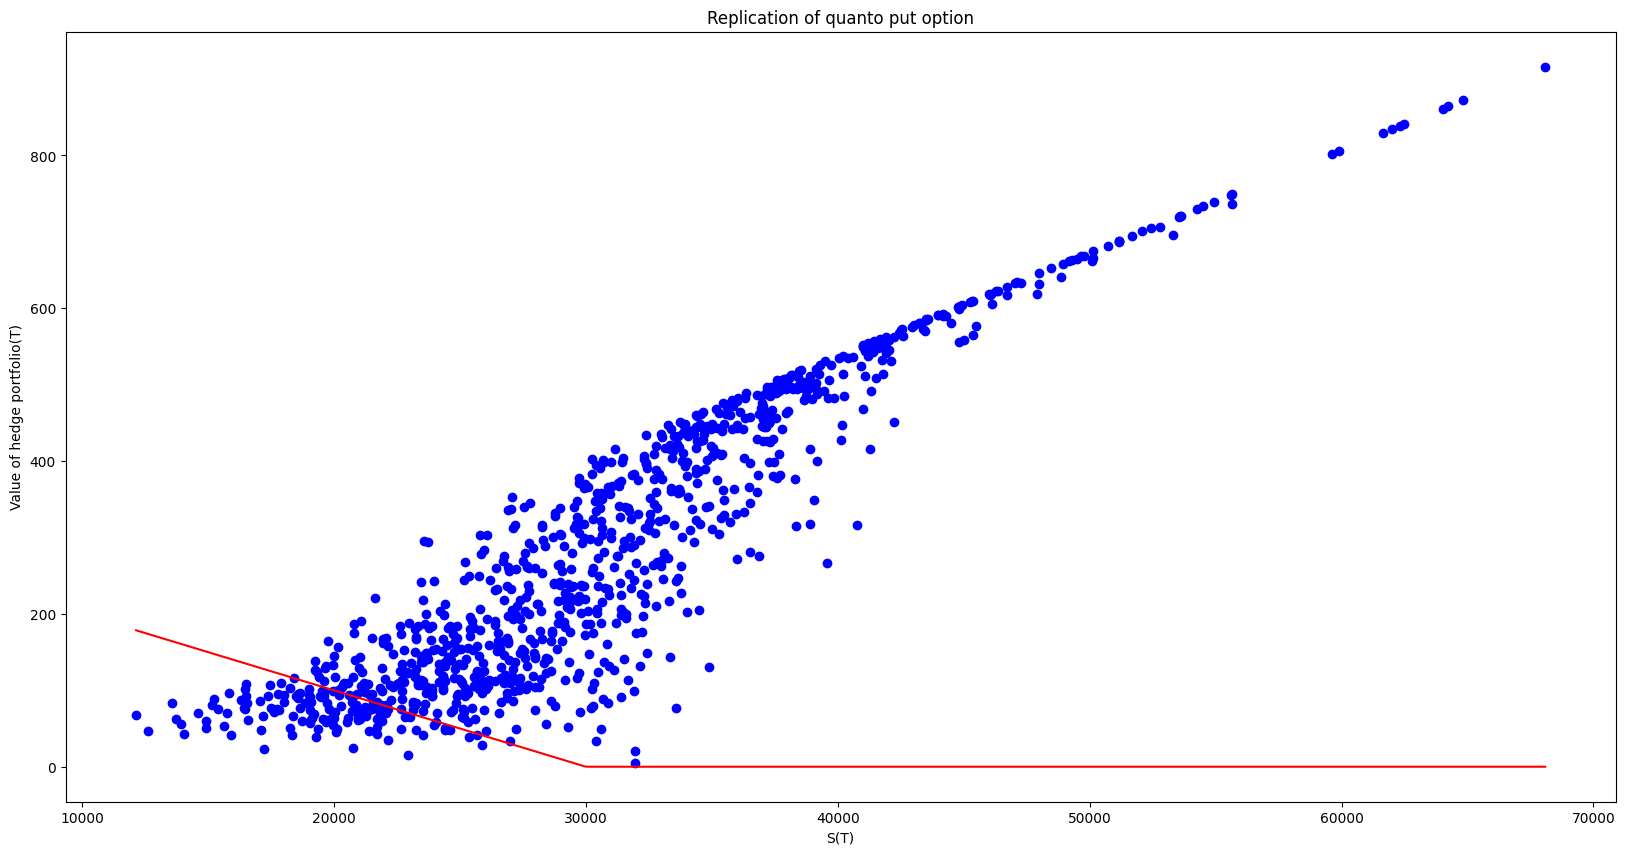

In [60]:
hedgeerror = (Vpf-X0 * np.maximum(K-ST,0))
optionpayoff = X0 * np.maximum(K-ST,0)
  
print("Initial investment =",round(initialoutlay,4))

plt.figure(figsize=(20,10))
plt.scatter(ST,XT*Vpf,label="Discrete hedging of a quanto put option",color='blue')
plt.ylabel("Value of hedge portfolio(T)")
plt.xlabel("S(T)")

x = np.sort(ST)
plt.plot(x, X0 * np.maximum(K-x,0),label='Payoff', color='red')
plt.title("Replication of quanto put option")
plt.show()